### Hierarchical Clustering
* 개념 소개
    * 특정 알고리즘에 의해 데이터들을 연결하여 계층적으로 클러스터를 구성해 나가는 방법이다.
    * 계층적 클러스터링은 최초에 클러스터 개수를 가정할 필요가 없다.
    * 계층적 클러스터링은 응집형(Agglomerative) 계층적 클러스터링과 분리형(Divisive) 계층적 클러스터링 두가지가 있다.

* 응집형(Agglomerative) 계층적 클러스터링
    * 정의
        * 주어진 데이터에서 개별 데이터 하나하나를 독립된 클러스터로 가정하고 이들을 특정 알고리즘에 의해 병합하여 상위단계 클러스터를 구성하고, 이렇게 구성된 상위단계 클러스터를 알고리즘에 의해 또 다시 병합하여 최종적으로 데이터 전체를 멤버로 하는 하나의 클러스터로 구성하는 방법이다.
    * 계층적 클러스터링 알고리즘
        * 단순연결(single linkage, Nearest Neighbor)
            - 2개의 클러스터에서 각 클러스터에 속하는 멤버 사이의 거리가 가장 가까운 거리를 모두 계산하고, 이 값들중 가장 작은 값들을 가지는 2개의 클러스터를 병합하여 상위 단계 클러스터를 구성한다.
        * 완전연결(complete linkage, Furhest Neighbor)
            - 2개의 클러스터에서 각 클러스터에 속하는 멤버사이의 거리가 가장 먼 거리를 모두 계산하고 이 값들중 가장 작은 값을 가지는 2개의 클러스터를 병합하여 상위 단계 클러스터를 구성한다.

* 분리형(Divisive) 계층적 클러스터링
    * 정의
        * 데이터 전체를 멤버로 하는 하나의 클러스터에서 시작하여 개별 데이터로 분리해 나가는 식으로 클러스터를 구성하는 방법이다.

In [16]:
# 완전연결을 이용한 계층적 클러스터링

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)
var = ['x','y']
labels = ['점0','점1','점2','점3','점4']
x = np.random.random_sample([5,2]) * 10
df = pd.DataFrame(x, columns=var, index=labels)
print(df)

           x         y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


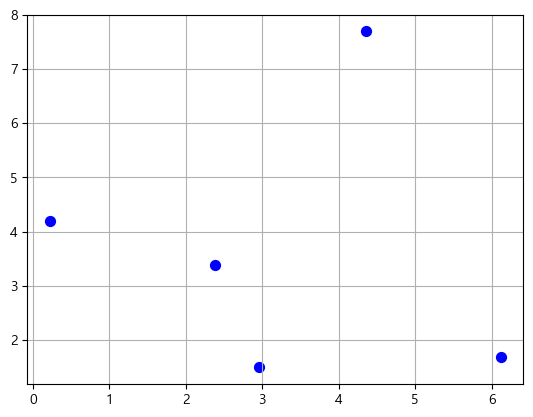

In [17]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(x[:,0], x[:,1], c='blue', marker='o', s=50)
plt.grid(True)
plt.show()

In [18]:
from scipy.spatial.distance import pdist, squareform
distmatrix = pdist(df, metric='euclidean') # 두 점 사이의 거리 계산
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)
row_dist

,점0,점1,점2,점3,점4
점0,0.000000,6.254970,3.174696,6.409487,4.097740
점1,6.254970,0.000000,6.358690,5.411807,4.745963
점2,3.174696,6.358690,0.000000,3.846035,1.968201
점3,6.409487,5.411807,3.846035,0.000000,2.314338
점4,4.097740,4.745963,1.968201,2.314338,0.000000


In [19]:
from scipy.cluster.hierarchy import linkage # linkage(): 응집형 계층적 클러스터링 수행
row_clusters = linkage(distmatrix, method='complete')
row_clusters

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [20]:
pd.DataFrame(row_clusters, columns=['클러스터id_1','클러스터id_2','거리','클러스터 멤버수'],
             index=['클러스터 %d' %(i+1) for i in range(row_clusters.shape[0])])


,클러스터id_1,클러스터id_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


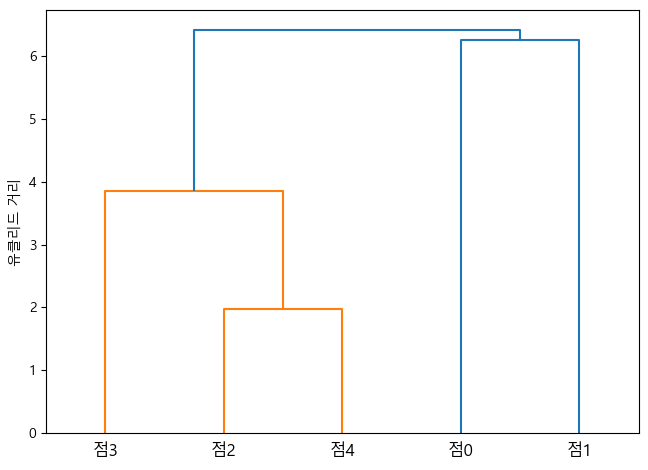

In [21]:
from scipy.cluster.hierarchy import dendrogram # dendrogram() 클러스터의 계층 구조를 표현
row_dendrogram = dendrogram(row_clusters, labels=labels)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
# n_clusters: 최종 클러스터 개수
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(x)
print('클러스터 분류 결과:', labels)
# 분류 결과는 나온 순서대로 점0~점4까지 5개


클러스터 분류 결과: [0 0 1 1 1]


In [23]:
full = squareform(np.arange(1,11)) #squareform (대각선을 0으로 하는 matrix생성)
full

array([[ 0,  1,  2,  3,  4],
       [ 1,  0,  5,  6,  7],
       [ 2,  5,  0,  8,  9],
       [ 3,  6,  8,  0, 10],
       [ 4,  7,  9, 10,  0]])

#### iris 데이터로 클러스터링

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

iris = sm.datasets.get_rdataset('iris', package='datasets')
iris_df = iris.data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

iris_df.Species = encoder.fit_transform(iris_df.Species)
iris_df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

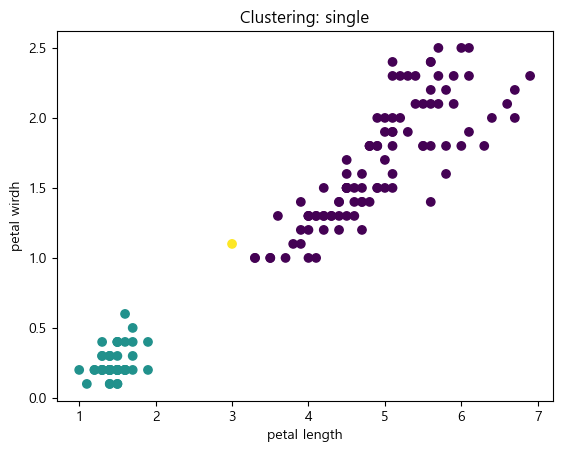

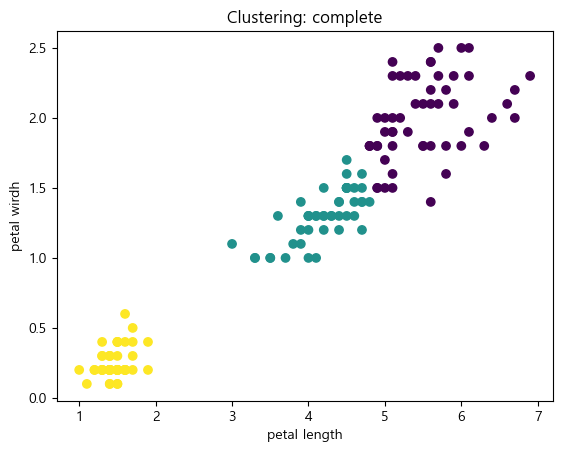

In [30]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage = ['single', 'complete'] # average, ward
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i)
    hier.fit(iris_df.iloc[:,2:4])
    plt.scatter(iris_df.iloc[:,2], iris_df.iloc[:,3], c=hier.labels_)
    plt.title('Clustering: '+ i)
    plt.xlabel('petal length')
    plt.ylabel('petal wirdh')
plt.show()

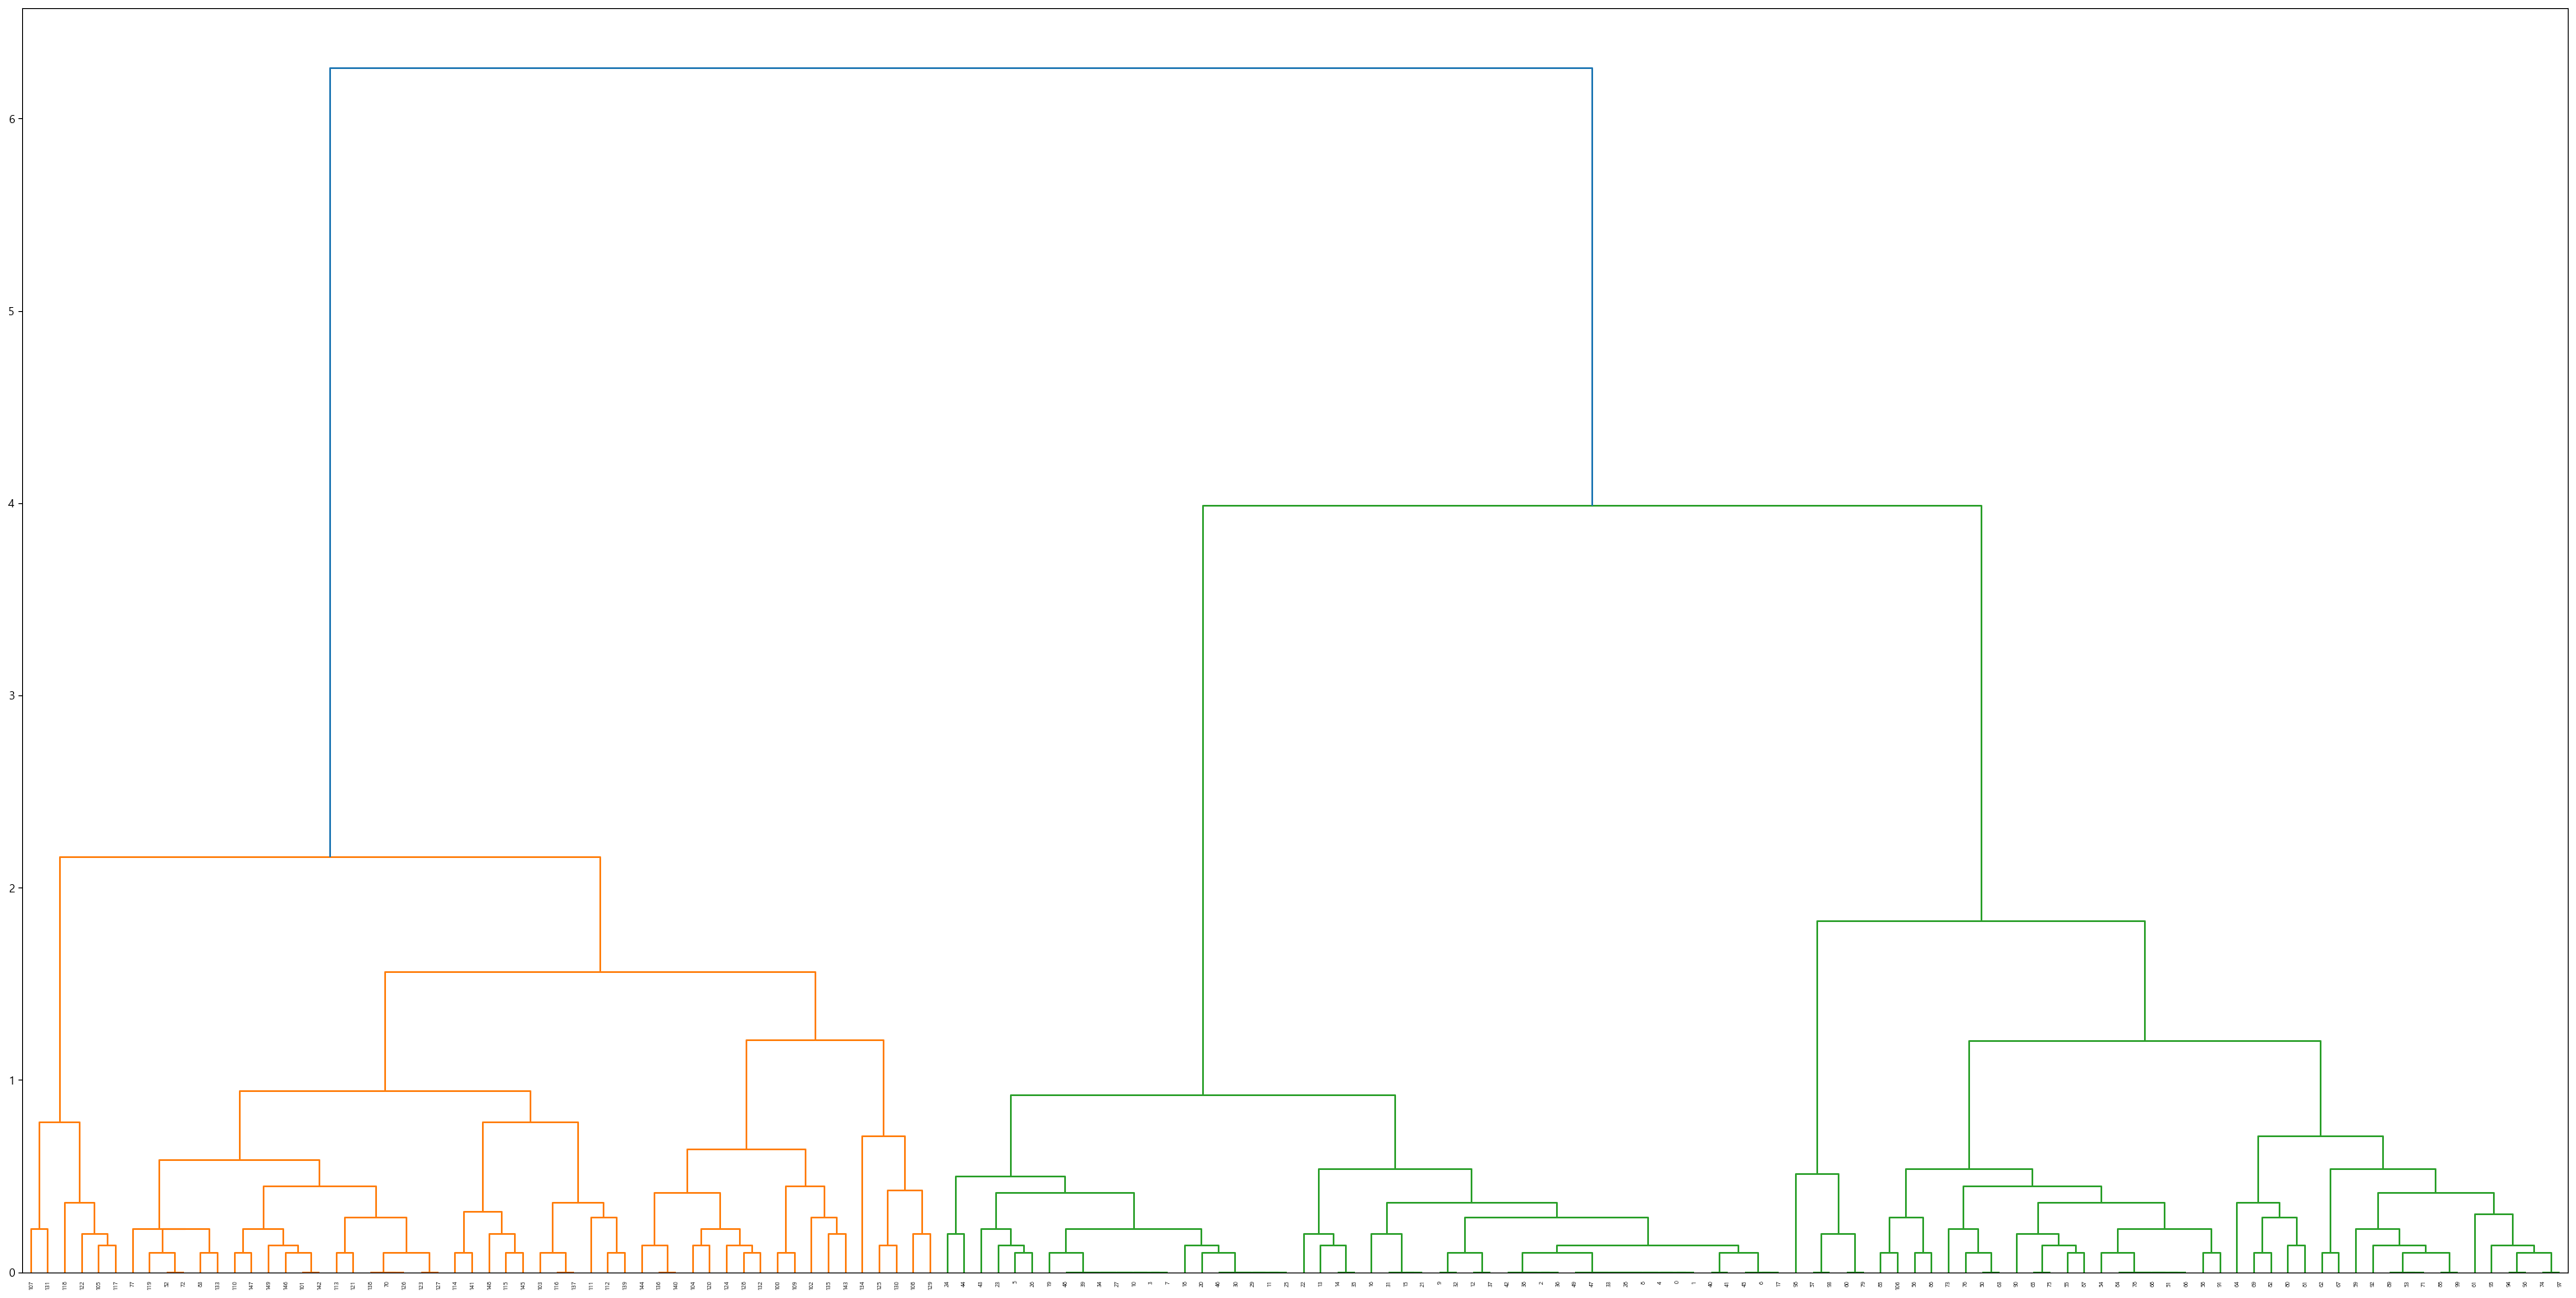

In [33]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clustering = linkage(iris_df.iloc[:,2:4], method='complete')

plt.figure(figsize=(40,20))
dendrogram(clustering)
plt.show()

In [34]:
from scipy.cluster.hierarchy import fcluster

predict = fcluster(clustering, 3, criterion='distance')
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
import numpy as np

adjusted_pred = np.choose((predict -1), [2,0,1]).astype(np.int64)
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [42]:
pred_name = encoder.inverse_transform(adjusted_pred)
original_name = encoder.inverse_transform(iris_df.Species)
original_name

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
ct = pd.crosstab(original_name, pred_name, rownames=['True'], colnames=['Predicted'], margins=True)
print(ct)

Predicted   0   1   2  All
True                      
0          50   0   0   50
1           0  45   5   50
2           0   1  49   50
All        50  46  54  150


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

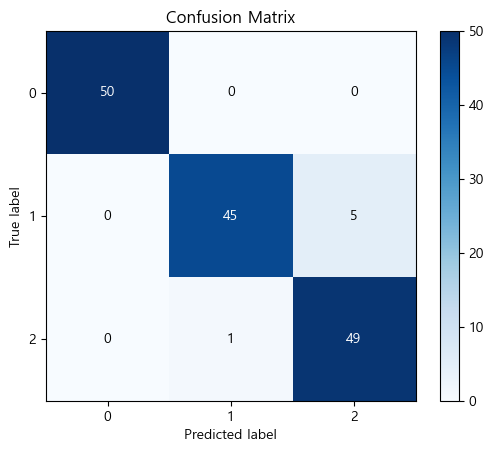

In [44]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(original_name, pred_name)